# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [15]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [17]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [19]:
# Memahami struktur data
print("Jumlah baris dan kolom:", df.shape)
print("Jenis data tiap kolom:")
print(df.dtypes)

Jumlah baris dan kolom: (48842, 14)
Jenis data tiap kolom:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object


In [20]:
# Menangani Data yang Hilang
# Mengisi nilai kosong di fitur kategorikal dengan mode, dan numerikal dengan median
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 
                    'capital-loss', 'hours-per-week']

for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

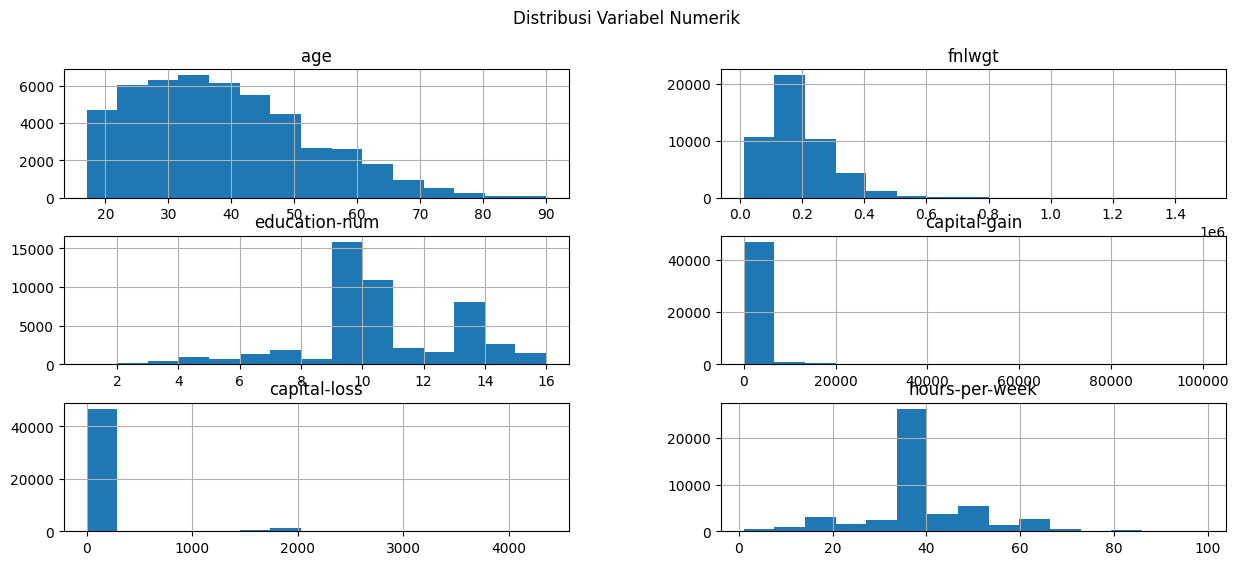

In [21]:
# Analisis Distribusi dan Korelasi
# Visualisasi distribusi variabel numerik
df[numeric_features].hist(bins=15, figsize=(15, 6))
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

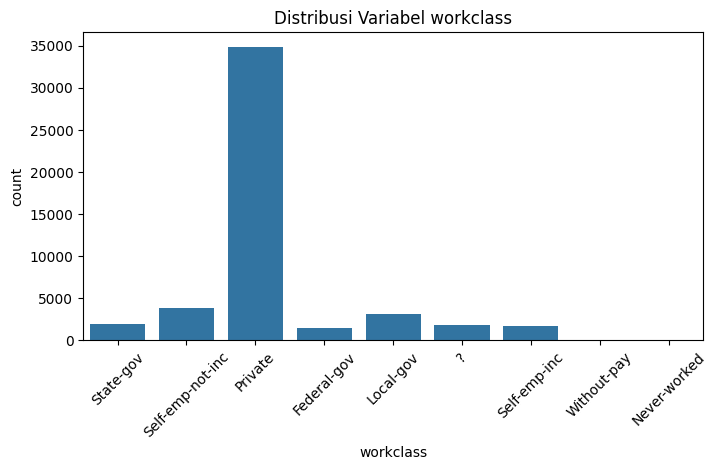

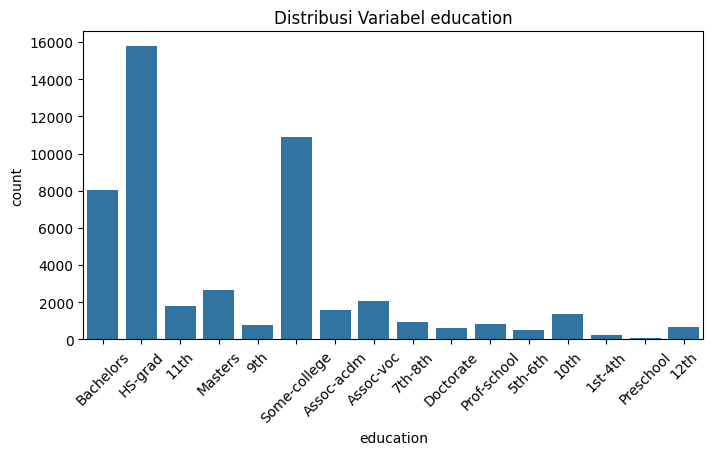

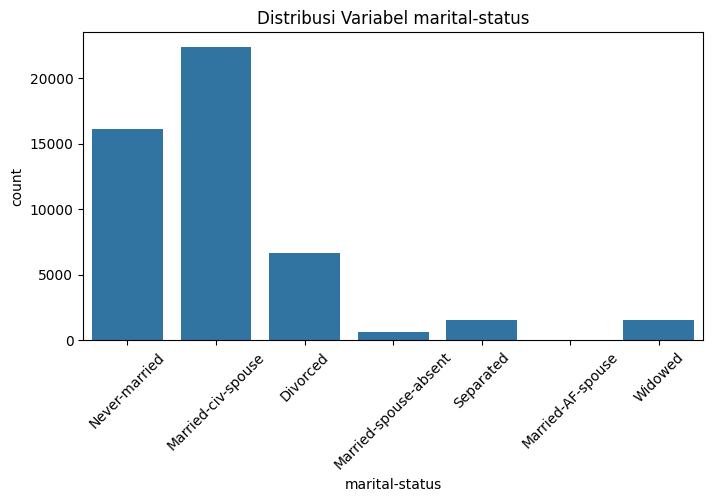

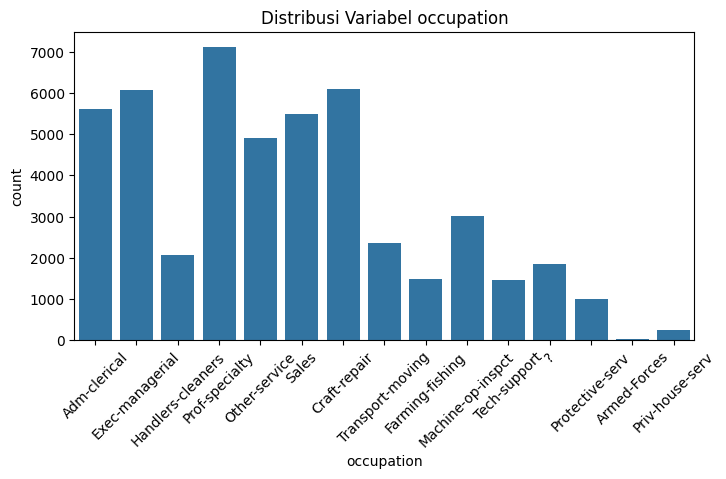

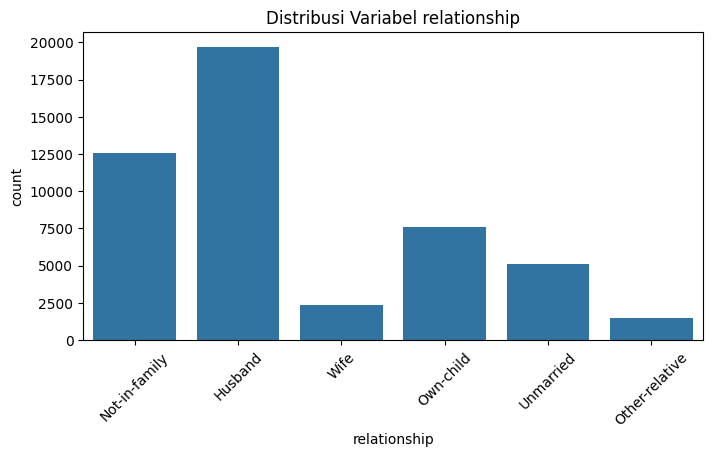

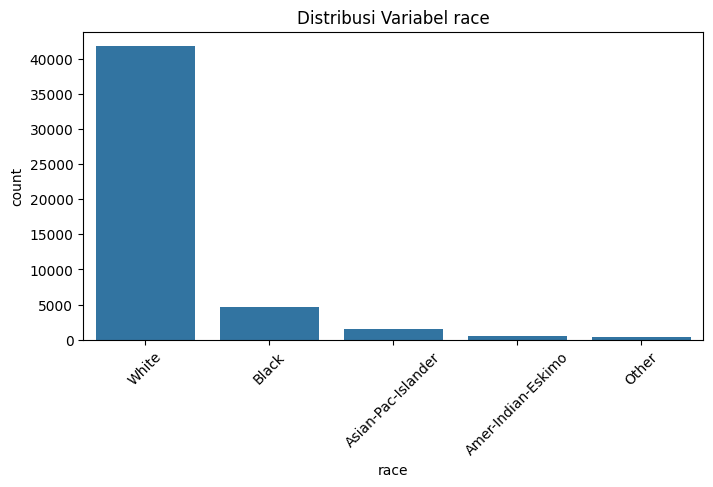

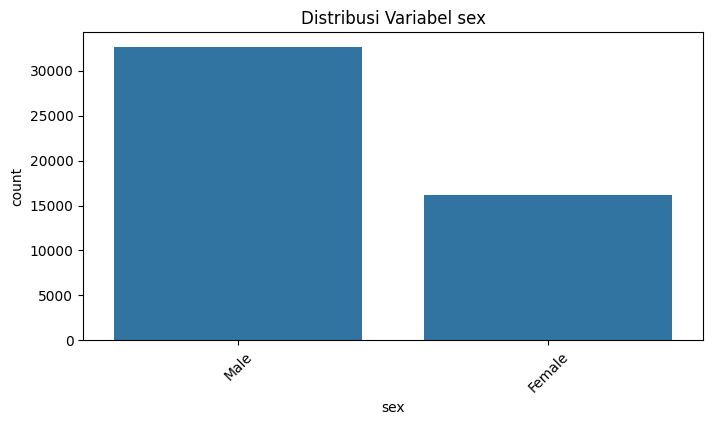

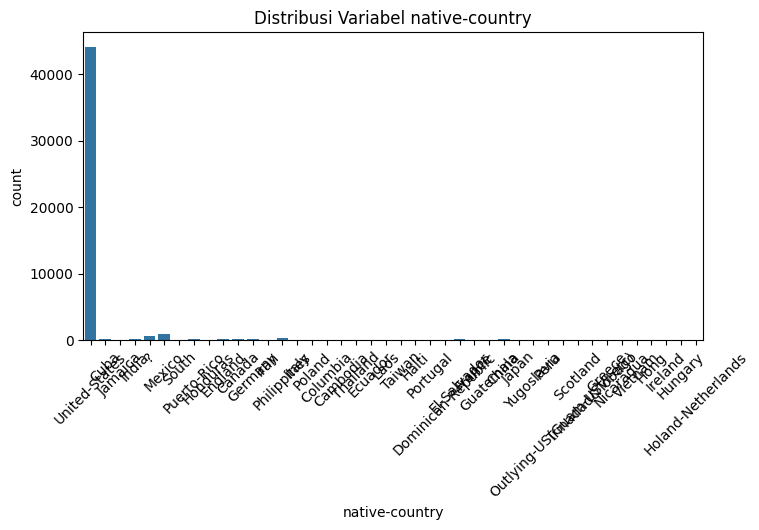

In [22]:
# Visualisasi variabel kategorikal
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribusi Variabel {col}")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [23]:
# Menghapus outliers menggunakan IQR untuk fitur numerik
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers(df, numeric_features)

In [24]:
# Scaling dan Encoding Data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

X_transformed = preprocessor.fit_transform(df_clean)

In [25]:
# Dapatkan nama fitur setelah encoding
encoded_features = numeric_features.copy()
for i, feature in enumerate(categorical_features):
    categories = preprocessor.named_transformers_['cat'].categories_[i][1:]
    encoded_features.extend([f"{feature}_{cat}" for cat in categories])
X = pd.DataFrame(X_transformed, columns=encoded_features)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
inertias = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

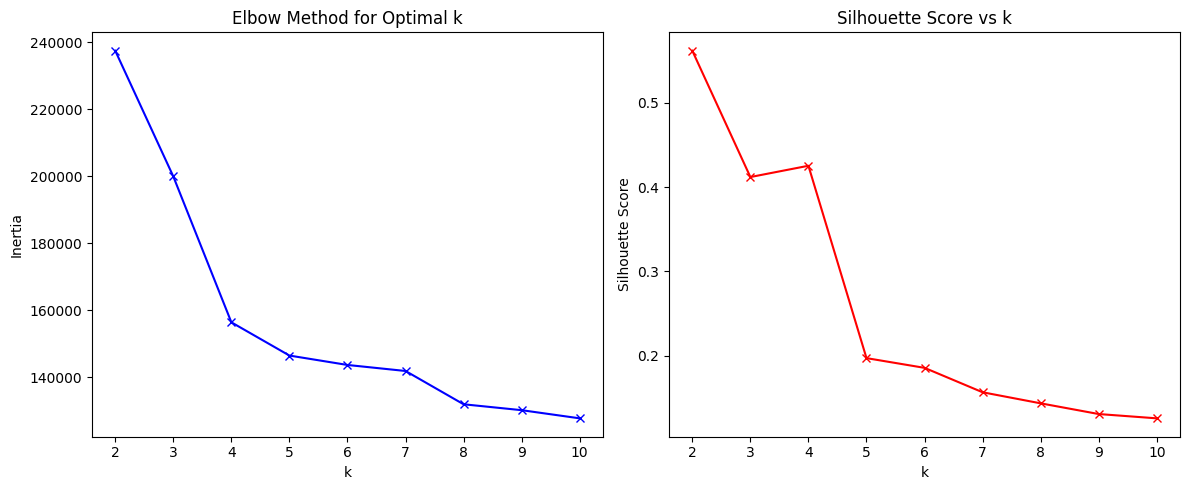

In [27]:
# Visualisasi Elbow Curve dan Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.tight_layout()
plt.show()

# Clustering dengan k optimal
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=500)
cluster_labels = kmeans.fit_predict(X)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
# Threshold for variance (filtering out low-variance features)
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X) # Seleksi fitur hanya berdasarkan variansi

# Lanjutkan PCA dan Clustering seperti sebelumnya
pca = PCA(n_components=2)
X_selected_pca = pca.fit_transform(X_selected)

# KMeans Clustering on Feature Selected + PCA Data
kmeans_selected_pca = KMeans(n_clusters=4, random_state=42)
kmeans_selected_pca.fit(X_selected_pca)
labels_selected_pca = kmeans_selected_pca.labels_

# Calculate Scores
silhouette_selected_pca = silhouette_score(X_selected_pca, labels_selected_pca)
calinski_selected_pca = calinski_harabasz_score(X_selected_pca, labels_selected_pca)

print("Approach 1: Variance Threshold -> PCA -> Clustering")
print("Silhouette Score:", silhouette_selected_pca)
print("Calinski-Harabasz Score:", calinski_selected_pca)

Approach 1: Variance Threshold -> PCA -> Clustering
Silhouette Score: 0.7528529586243672
Calinski-Harabasz Score: 148395.23689248468


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [31]:
# PCA directly on X
pca_direct = PCA(n_components=2)
X_pca_direct = pca_direct.fit_transform(X)

# KMeans Clustering on PCA-only Data
kmeans_pca_direct = KMeans(n_clusters=4, random_state=42)
kmeans_pca_direct.fit(X_pca_direct)
labels_pca_direct = kmeans_pca_direct.labels_

# Calculate Scores
silhouette_pca_direct = silhouette_score(X_pca_direct, labels_pca_direct)
calinski_pca_direct = calinski_harabasz_score(X_pca_direct, labels_pca_direct)

print("\nApproach 2: PCA -> Clustering")
print("Silhouette Score:", silhouette_pca_direct)
print("Calinski-Harabasz Score:", calinski_pca_direct)


Approach 2: PCA -> Clustering
Silhouette Score: 0.7507464583626771
Calinski-Harabasz Score: 145436.37580216027


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [34]:
df_clean['Cluster_Label'] = labels_selected_pca
df_clean

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Cluster_Label
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,0
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,3
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,0



Karakteristik numerik untuk setiap cluster:
                 age                   fnlwgt                      \
                mean    std median       mean       std    median   
Cluster_Label                                                       
0              37.86  12.20   36.0  181052.60  87245.33  176730.0   
1              39.32  11.00   38.0  179161.98  87590.02  176063.0   
2              38.82  10.89   38.0  175003.68  85266.15  173866.0   
3              36.33  13.75   34.0  184564.12  85765.55  179706.0   

              education-num              capital-gain              \
                       mean   std median         mean  std median   
Cluster_Label                                                       
0                     10.08  2.09   10.0          0.0  0.0    0.0   
1                     10.84  2.27   10.0          0.0  0.0    0.0   
2                     10.70  2.22   10.0          0.0  0.0    0.0   
3                     10.08  2.10   10.0          0.0  0.

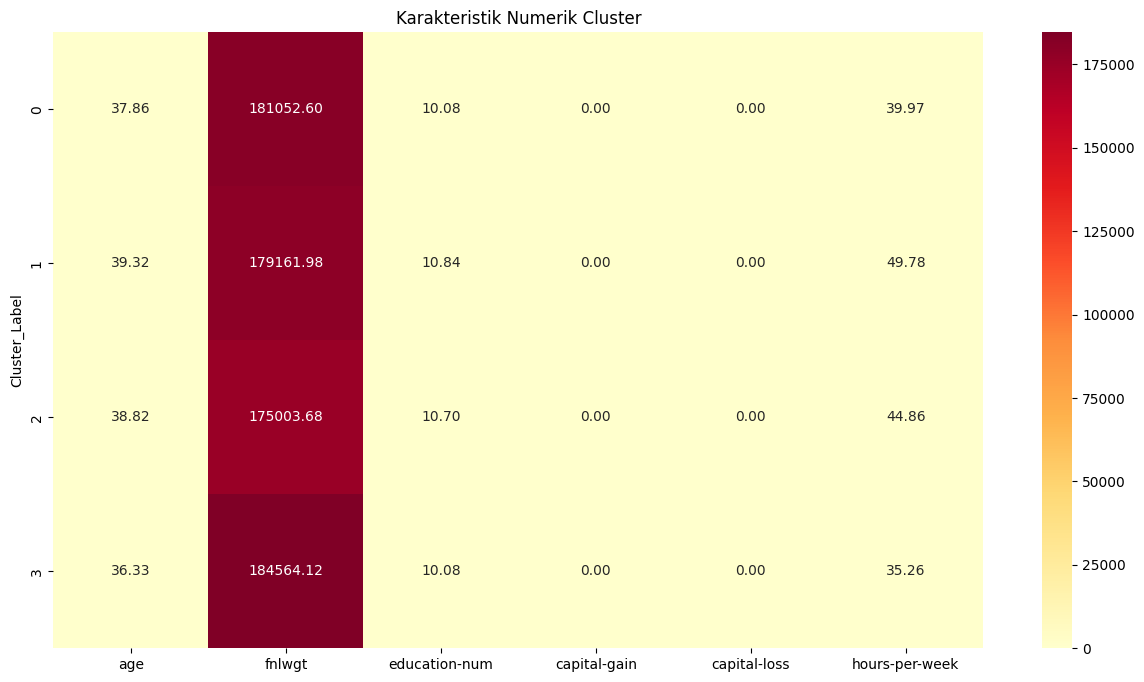


Top 3 kategori untuk setiap fitur kategorikal per cluster:

workclass:

Cluster 0:
Private: 74.8%
Local-gov: 7.2%
State-gov: 5.0%

Cluster 1:
Private: 68.5%
Self-emp-not-inc: 12.3%
Self-emp-inc: 6.3%

Cluster 2:
Private: 77.9%
Self-emp-not-inc: 6.6%
Local-gov: 6.1%

Cluster 3:
Private: 71.6%
Local-gov: 8.7%
Self-emp-not-inc: 8.4%

education:

Cluster 0:
HS-grad: 38.7%
Some-college: 22.5%
Bachelors: 15.1%

Cluster 1:
HS-grad: 30.7%
Bachelors: 23.3%
Some-college: 20.8%

Cluster 2:
HS-grad: 31.5%
Bachelors: 22.6%
Some-college: 20.5%

Cluster 3:
HS-grad: 36.4%
Some-college: 24.9%
Bachelors: 13.6%

marital-status:

Cluster 0:
Married-civ-spouse: 42.8%
Never-married: 33.6%
Divorced: 15.9%

Cluster 1:
Married-civ-spouse: 58.5%
Never-married: 23.9%
Divorced: 13.5%

Cluster 2:
Married-civ-spouse: 54.0%
Never-married: 26.4%
Divorced: 14.9%

Cluster 3:
Never-married: 44.5%
Married-civ-spouse: 28.1%
Divorced: 16.1%

occupation:

Cluster 0:
Craft-repair: 15.4%
Adm-clerical: 15.3%
Prof-specialty: 1

Text(0, 0.5, 'Jumlah Data Points')

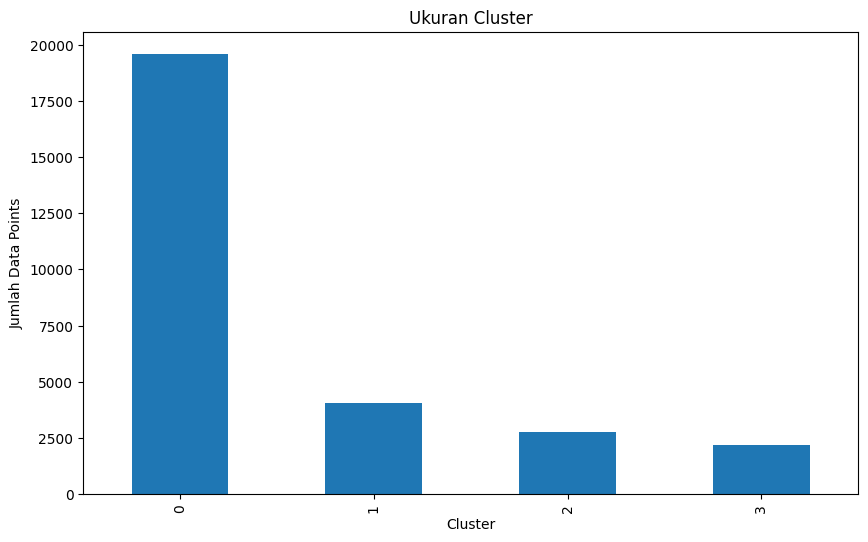

In [36]:
# Analisis numerik per cluster
print("\nKarakteristik numerik untuk setiap cluster:")
numeric_profiles = df_clean.groupby('Cluster_Label')[numeric_features].agg([
    'mean', 'std', 'median'
]).round(2)
print(numeric_profiles)

# Heatmap karakteristik cluster
plt.figure(figsize=(15, 8))
cluster_means = df_clean.groupby('Cluster_Label')[numeric_features].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Karakteristik Numerik Cluster')
plt.show()

# Analisis kategorikal per cluster
print("\nTop 3 kategori untuk setiap fitur kategorikal per cluster:")
for feature in categorical_features:
    print(f"\n{feature}:")
    for cluster in range(n_clusters):
        cluster_data = df_clean[df_clean['Cluster_Label'] == cluster][feature]
        top_categories = cluster_data.value_counts().nlargest(3)
        print(f"\nCluster {cluster}:")
        for cat, count in top_categories.items():
            percentage = (count / len(cluster_data)) * 100
            print(f"{cat}: {percentage:.1f}%")

# 8. Menghitung ukuran cluster
cluster_sizes = df_clean['Cluster_Label'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Ukuran Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data Points')

1. Analisis Karakteristik Numerik
- Cluster 0:

Rata-rata usia adalah 37,86 tahun, dengan mayoritas data points bekerja 40 jam per minggu. Ini menunjukkan bahwa Cluster 0 terdiri dari orang-orang yang bekerja dengan rata-rata jam kerja standar.
Distribusi pekerjaan lebih banyak pada sektor Private, dengan pekerjaan utama di bidang Craft-repair dan Adm-clerical.
Dalam hal pendidikan, banyak anggota di cluster ini yang lulusan HS-grad dan Some-college.
- Cluster 1:

Rata-rata usia sedikit lebih tua, yaitu 39,32 tahun. Cluster ini bekerja dengan jam kerja tertinggi, rata-rata hampir 50 jam per minggu.
Lebih banyak orang dalam kelompok ini adalah pria (81,3%) dan sebagian besar bekerja di sektor Exec-managerial dan Prof-specialty.
Tingkat pendidikan sedikit lebih tinggi, dengan lebih banyak lulusan Bachelors dibandingkan cluster lainnya.
- Cluster 2:

Usia rata-rata adalah 38,82 tahun, dengan jam kerja mingguan sekitar 45 jam.
Sebagian besar dari kelompok ini bekerja di sektor Exec-managerial atau Craft-repair.
Secara demografis, cluster ini memiliki kesamaan dengan Cluster 1 dalam hal jenis kelamin dan pekerjaan.
- Cluster 3:

Usia rata-rata adalah yang termuda, 36,33 tahun, dengan jam kerja terendah di antara semua cluster, yaitu sekitar 35 jam per minggu.
Distribusi gender lebih seimbang, dengan persentase perempuan lebih tinggi dibandingkan cluster lain.
Pekerjaan utama di sektor Other-service dan Adm-clerical, yang mungkin menunjukkan pekerjaan paruh waktu atau sektor jasa yang berbeda.

2. Analisis Karakteristik Kategorikal
- Workclass:
Sebagian besar anggota dari semua cluster bekerja di sektor Private, tetapi Cluster 1 memiliki lebih banyak pekerja di sektor Self-emp-not-inc.
- Education:
Tingkat pendidikan bervariasi, dengan HS-grad mendominasi di hampir semua cluster, terutama di Cluster 0 dan 3, sementara Cluster 1 memiliki lebih banyak lulusan Bachelors.
- Marital Status:
Cluster 3 memiliki persentase Never-married tertinggi, menunjukkan mungkin terdiri dari orang-orang yang lebih muda atau belum menikah.
Sebaliknya, Cluster 1 dan 2 memiliki lebih banyak anggota Married-civ-spouse, menunjukkan mungkin lebih banyak orang yang telah mapan dalam kehidupan rumah tangga.
- Occupation:
Cluster 1 dan 2 memiliki lebih banyak pekerjaan manajerial (Exec-managerial), sementara Cluster 3 lebih banyak bekerja di sektor jasa.
- Relationship:
Cluster 0 dan 1 memiliki banyak orang yang berstatus Husband, menunjukkan potensi anggota yang sudah menikah dan kepala keluarga.
- Sex:
Cluster 3 adalah satu-satunya yang memiliki jumlah perempuan lebih banyak daripada laki-laki, sedangkan Cluster 1 dan 2 mayoritas laki-laki.
- Native Country:
Mayoritas dari semua cluster berasal dari United-States, dengan Cluster 1 memiliki persentase tertinggi yang lahir di AS.

3. Analisis Ukuran Cluster
- Ukuran cluster menunjukkan bahwa Cluster 0 adalah yang terbesar, dengan hampir 20.000 data points. Ini bisa menjadi representasi kelompok yang umum di dalam dataset Anda.
- Cluster 1, 2, dan 3 lebih kecil, yang mungkin mengindikasikan karakteristik yang lebih spesifik atau unik dalam populasi.
Kesimpulan
- Cluster 0: Kelompok pekerja berusia menengah dengan jam kerja standar, didominasi oleh lulusan SMA, dan bekerja di sektor swasta.
- Cluster 1: Kelompok pekerja dengan jam kerja tinggi dan lebih banyak peran manajerial, cenderung lebih mapan dalam pernikahan.
- Cluster 2: Kelompok pekerja dengan jam kerja sedang dan peran yang serupa dengan Cluster 1, tetapi dengan distribusi usia sedikit lebih muda.
- Cluster 3: Kelompok pekerja yang lebih muda dengan lebih banyak wanita, cenderung bekerja dengan jam kerja lebih rendah di sektor jasa.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [37]:
df_clean.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Cluster_Label
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,2


In [38]:
df_clean.to_csv('adult_clustering.csv', index=False)